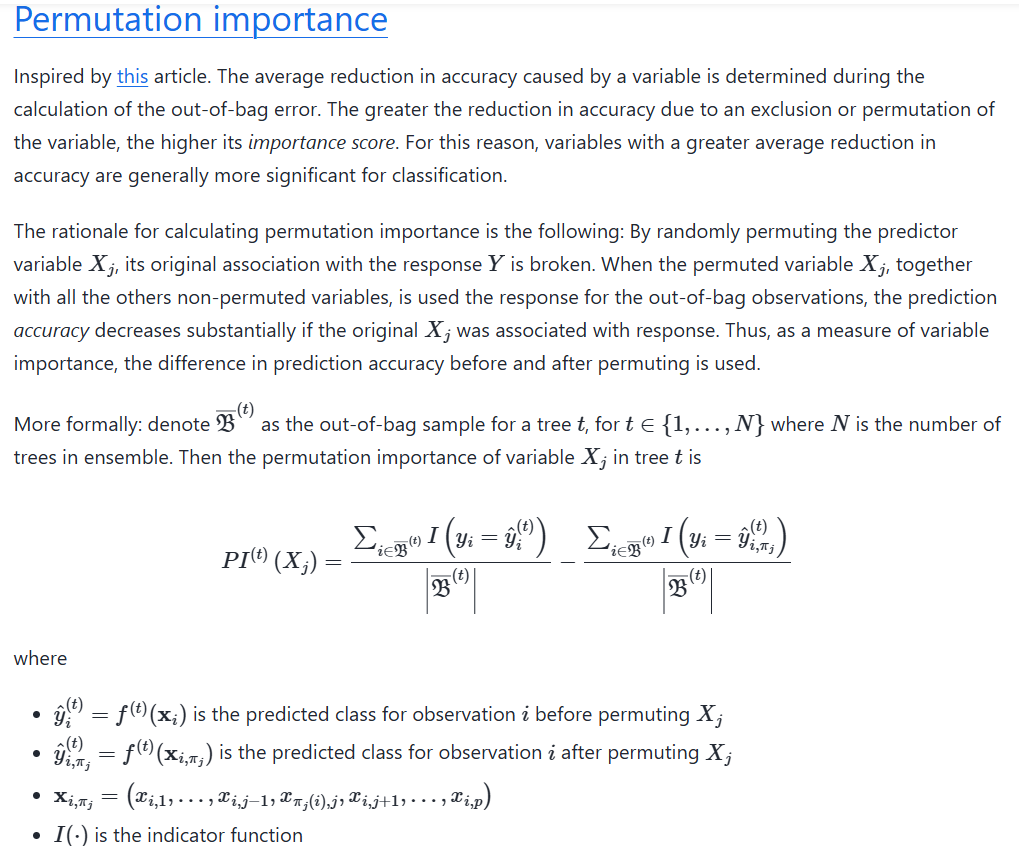

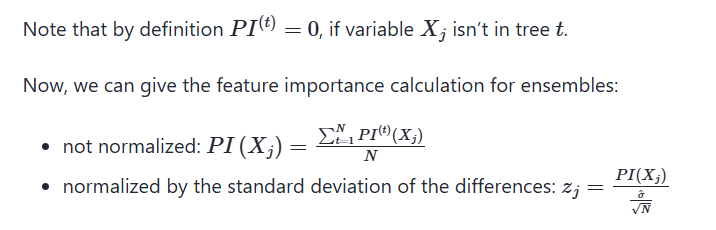

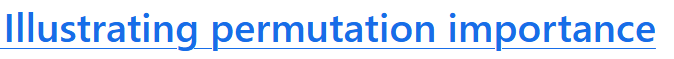

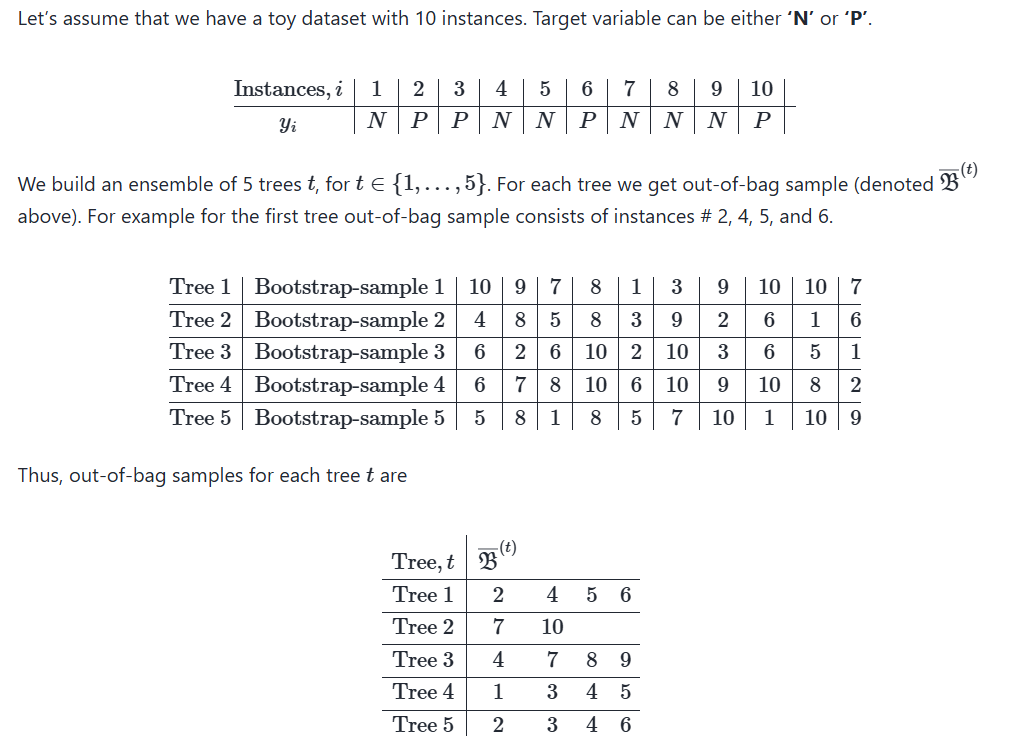

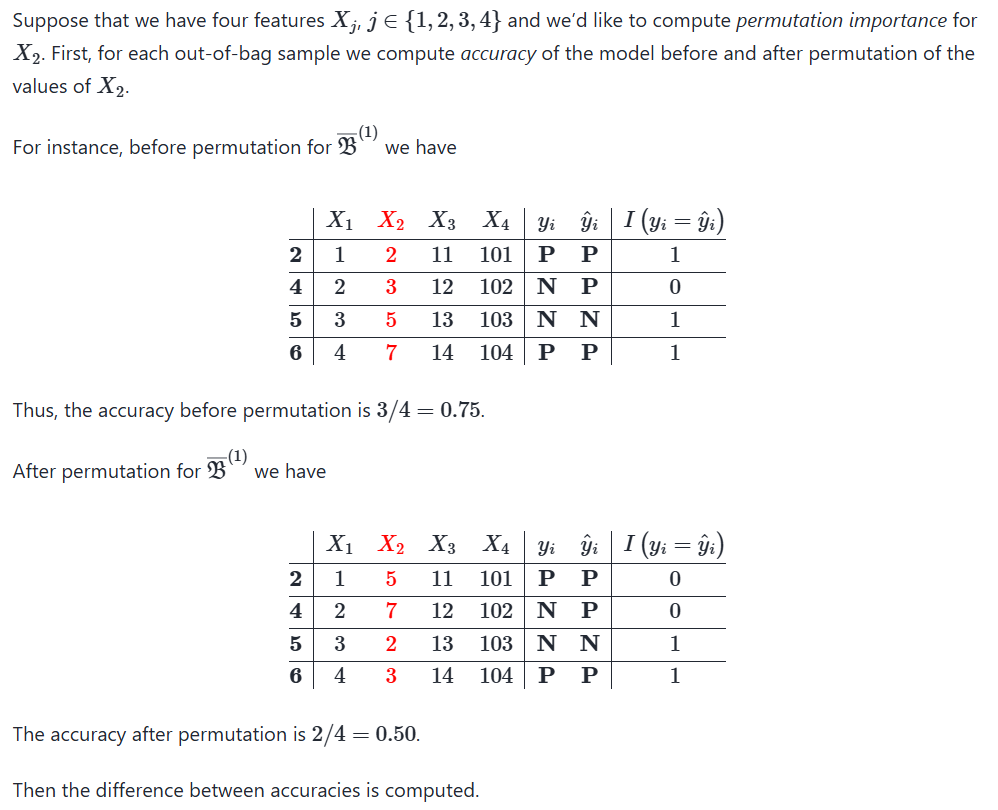

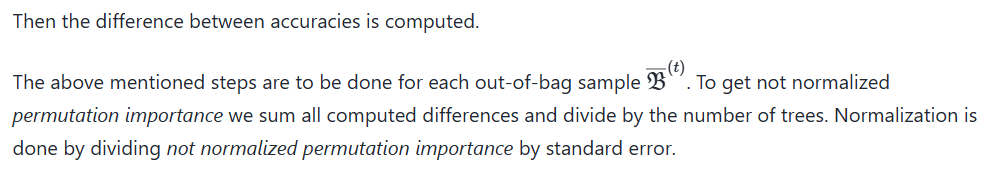

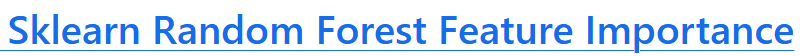

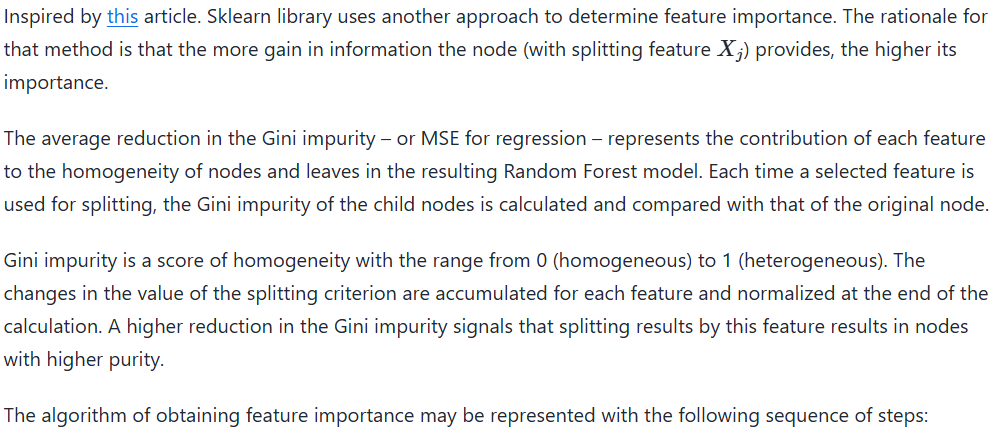

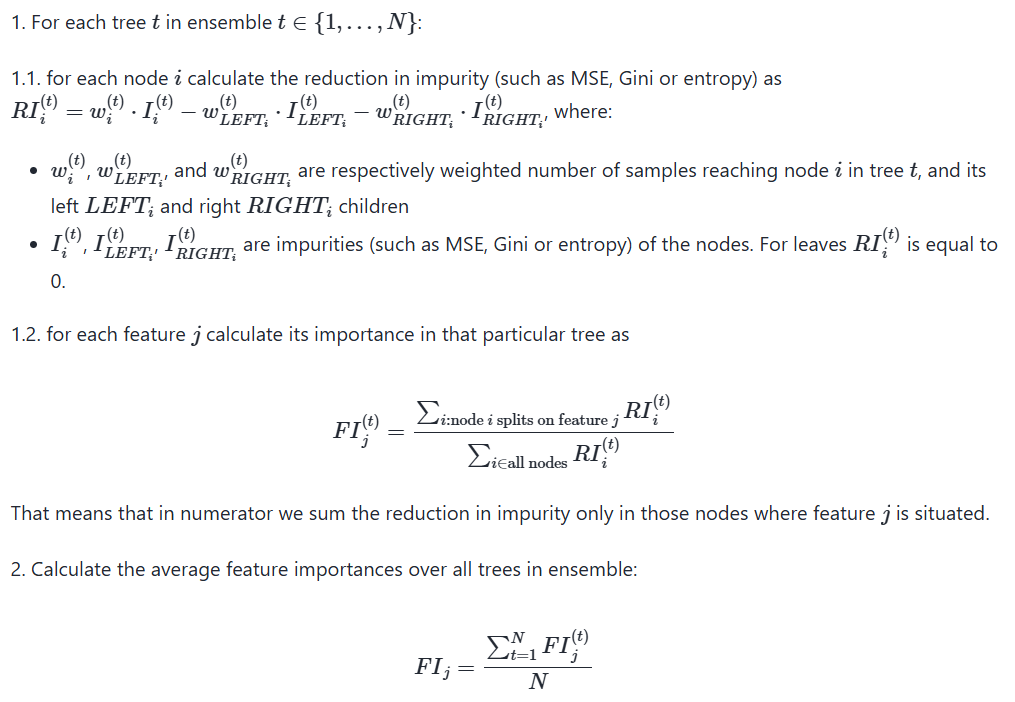

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
data = iris["data"]
target = iris["target"]

In [2]:
data = pd.DataFrame(data, columns=iris["feature_names"])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
target = pd.Series(target).map({0: 0, 1: 0, 2: 1})

In [4]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=17)
rfc.fit(data, target);

In [5]:
tree_list = rfc.estimators_

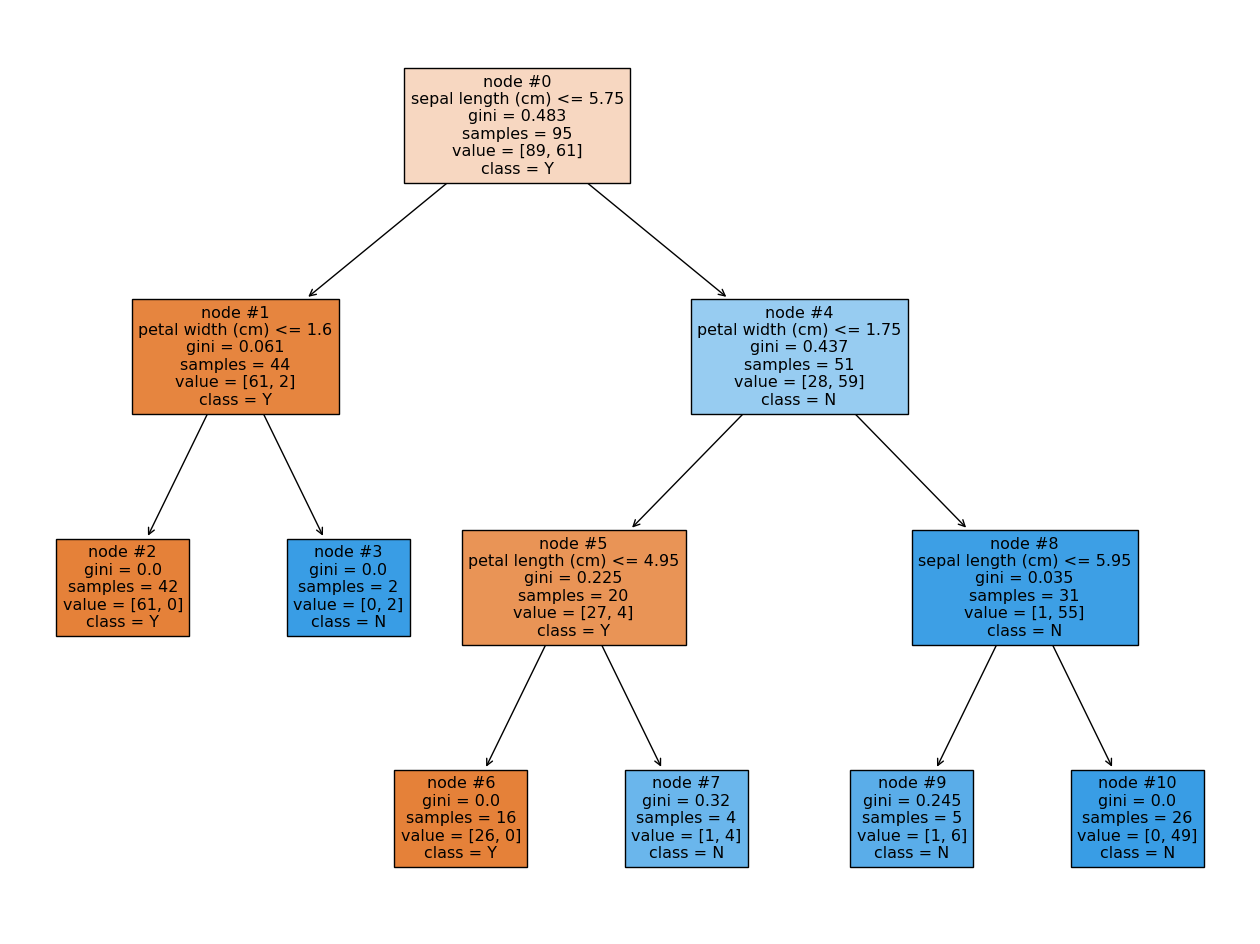

In [6]:
from sklearn import tree

plt.figure(figsize=(16, 12))
tree.plot_tree(
    tree_list[0],
    filled=True,
    feature_names=iris["feature_names"],
    class_names=["Y", "N"],
    node_ids=True,
);

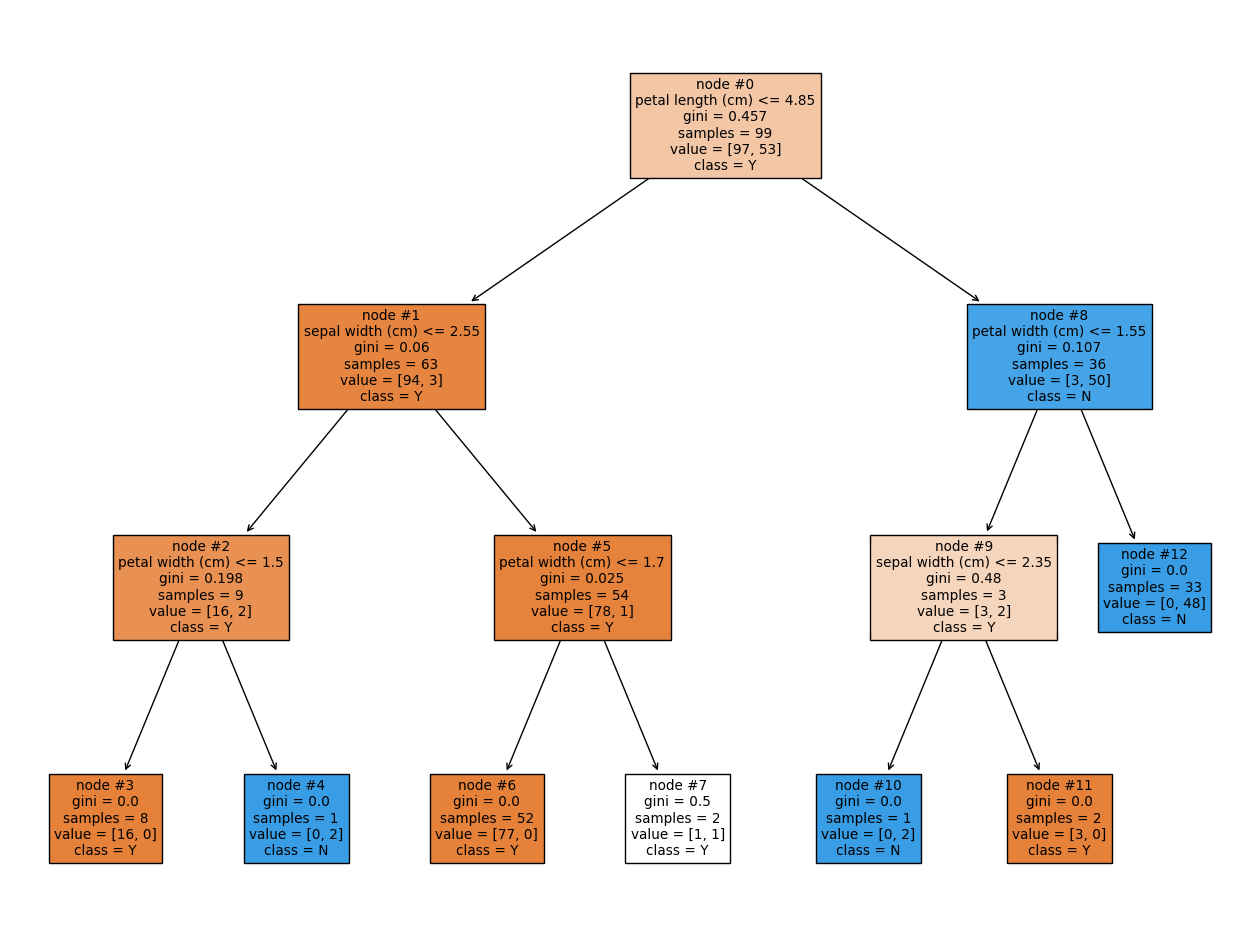

In [7]:
plt.figure(figsize=(16, 12))
tree.plot_tree(
    tree_list[1],
    filled=True,
    feature_names=iris["feature_names"],
    class_names=["Y", "N"],
    node_ids=True,
);

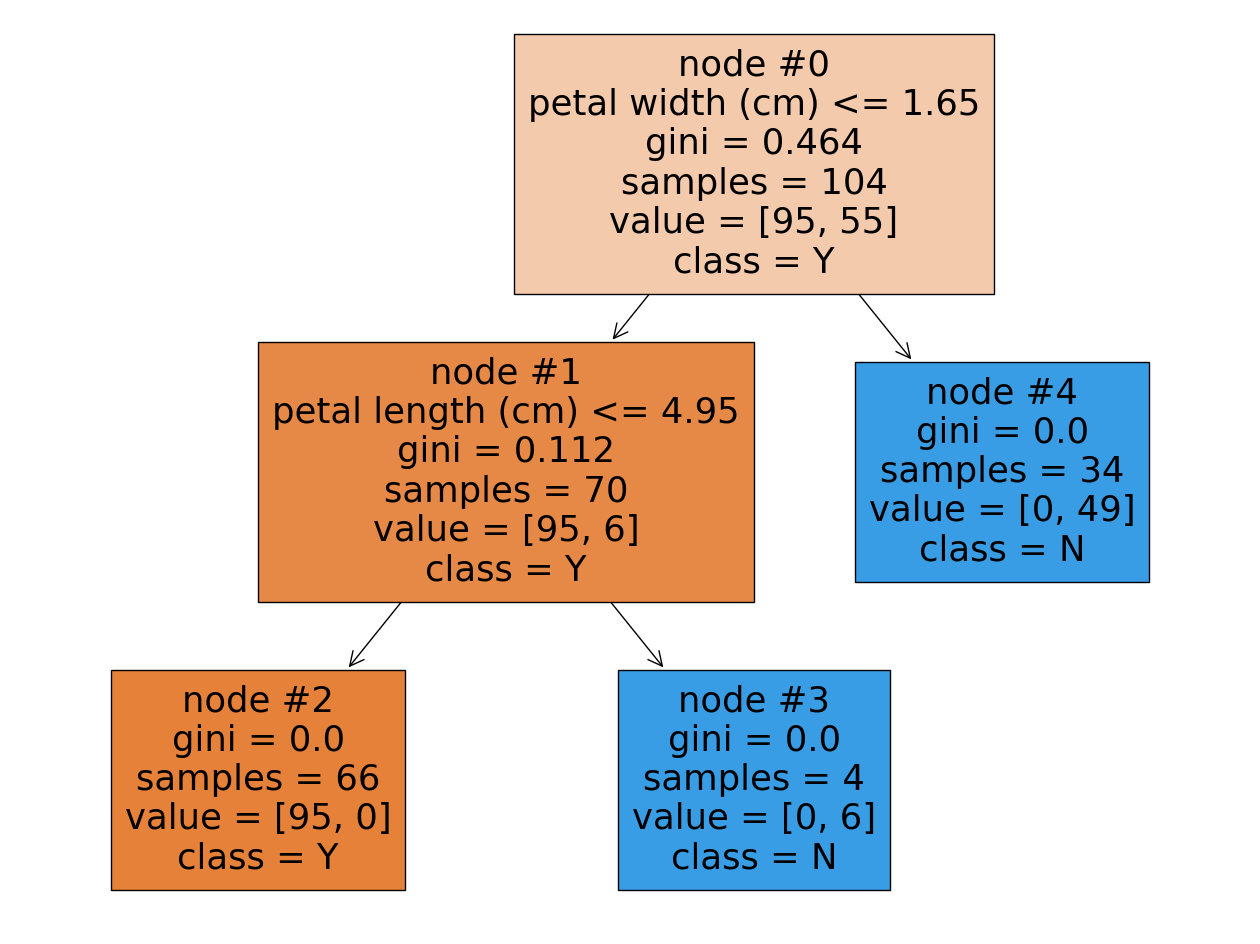

In [8]:
plt.figure(figsize=(16, 12))
tree.plot_tree(
    tree_list[2],
    filled=True,
    feature_names=iris["feature_names"],
    class_names=["Y", "N"],
    node_ids=True,
);

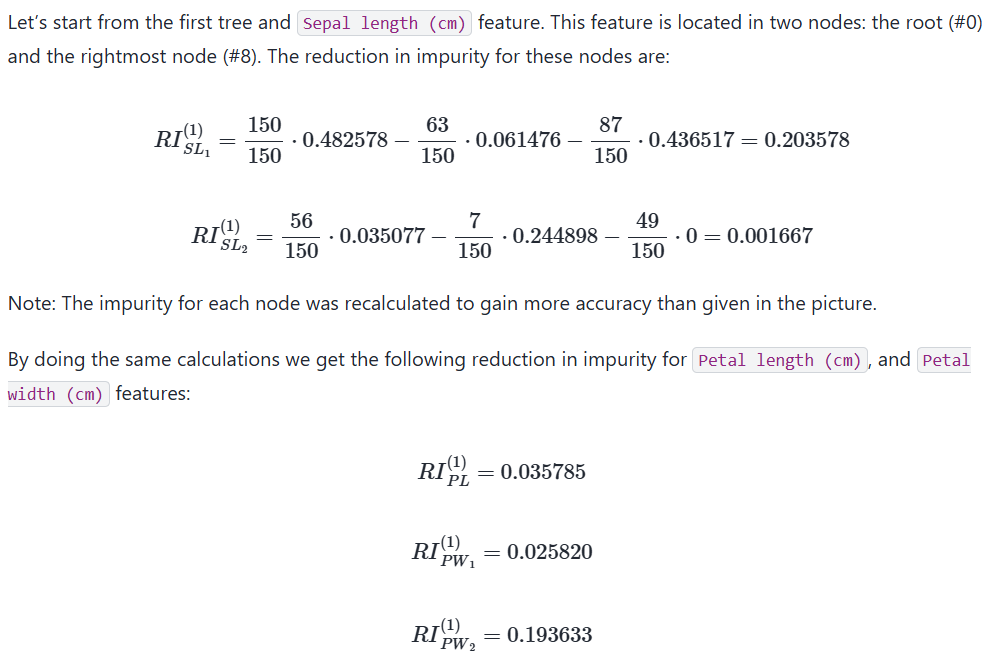

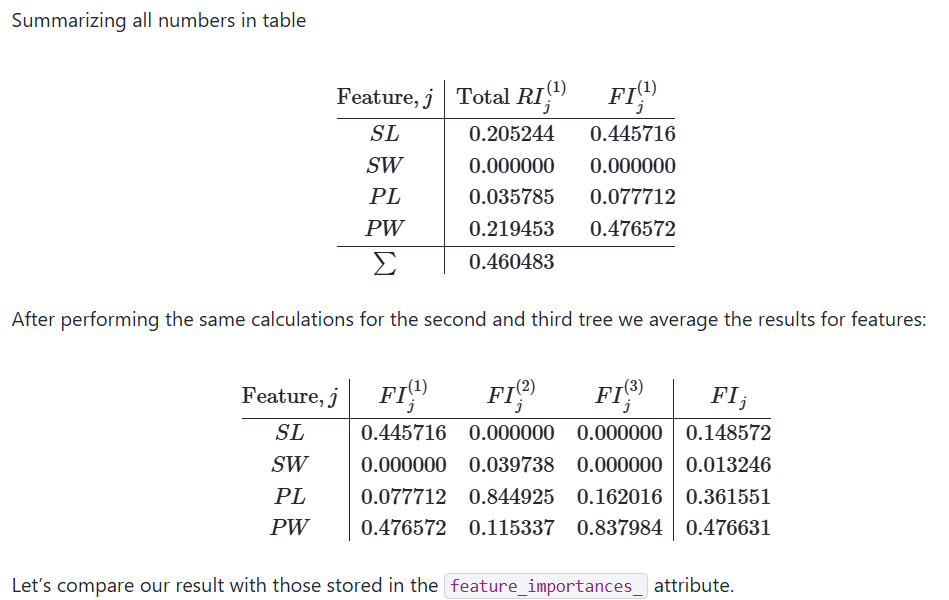

In [9]:
print(iris["feature_names"])
print(rfc.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.14857187 0.01324612 0.36155096 0.47663104]


<BarContainer object of 4 artists>

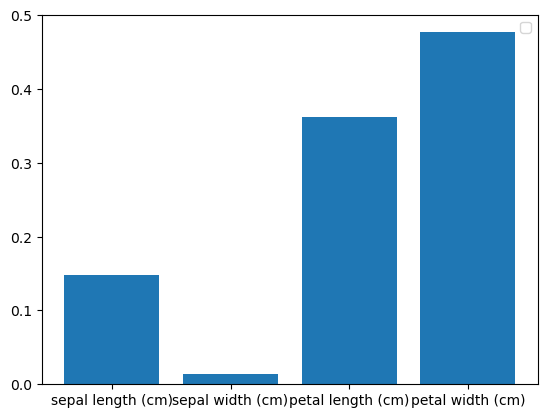

In [18]:

plt.bar(data.columns, rfc.feature_importances_)

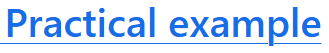

In [19]:
from sklearn.ensemble import RandomForestRegressor

# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

Feature ranking:
1. Staff 0.183150 
2. Value for money 0.147704 
3. Shared space condition 0.128188 
4. Extra services 0.116819 
5. Customer Co-creation 0.105748 
6. General conditions & conveniences 0.088730 
7. Shared kitchen condition 0.074776 
8. Check-in and check-out 0.061881 
9. Hostel booking 0.053899 
10. Room condition 0.039105 


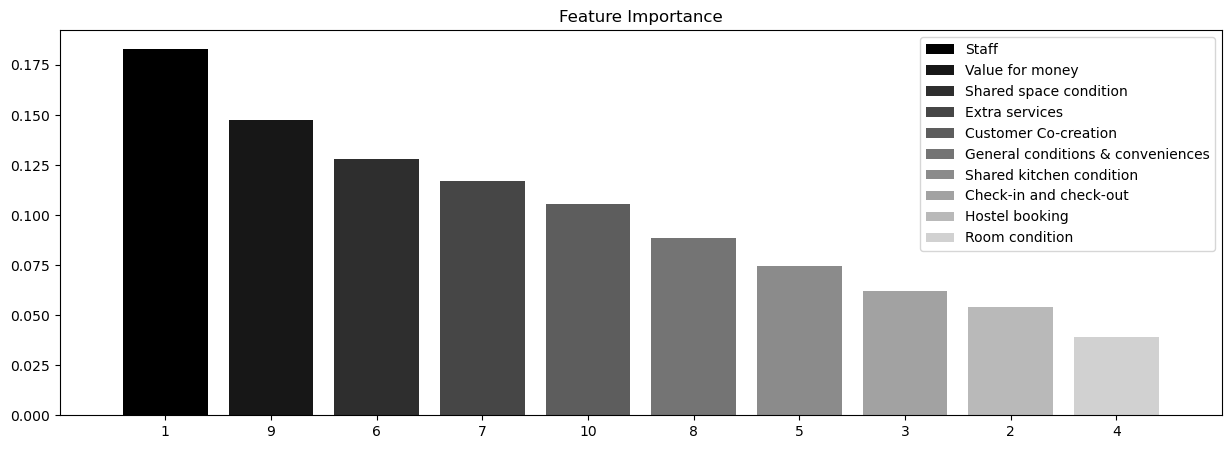

In [20]:
hostel_data = pd.read_csv(DATA_PATH + "hostel_factors.csv")
features = {
    "f1": u"Staff",
    "f2": u"Hostel booking",
    "f3": u"Check-in and check-out",
    "f4": u"Room condition",
    "f5": u"Shared kitchen condition",
    "f6": u"Shared space condition",
    "f7": u"Extra services",
    "f8": u"General conditions & conveniences",
    "f9": u"Value for money",
    "f10": u"Customer Co-creation",
}

forest = RandomForestRegressor(n_estimators=1000, max_features=10, random_state=0)

forest.fit(hostel_data.drop(["hostel", "rating"], axis=1), hostel_data["rating"])
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 10
feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(
        "%d. %s %f "
        % (f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])
    )
plt.figure(figsize=(15, 5))
plt.title(u"Feature Importance")
bars = plt.bar(
    range(num_to_plot),
    importances[indices[:num_to_plot]],
    color=([str(i / float(num_to_plot + 1)) for i in range(num_to_plot)]),
    align="center",
)
ticks = plt.xticks(range(num_to_plot), feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u"".join(features["f" + str(i)]) for i in feature_indices]);

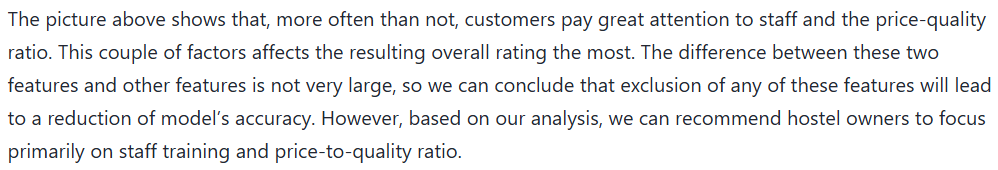